In [1]:
pip install -U scikit-fuzzy

Note: you may need to restart the kernel to use updated packages.


In [8]:
from skfuzzy.control.term import WeightedTerm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from time import sleep
import random
count=0


In [9]:
amplitude = ctrl.Antecedent(np.arange(5, 100, 1.00), 'amplitude')
activity = ctrl.Consequent(np.arange(1, 10, 1.00), 'activity')

C:\Users\PC\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


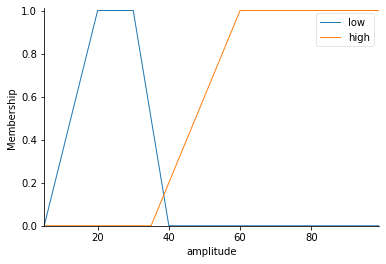

In [10]:
amplitude['low'] = fuzz.trapmf(amplitude.universe, [5, 20, 30, 40])
amplitude['high'] = fuzz.trapmf(amplitude.universe, [35, 60, 100, 100])
amplitude.view()

C:\Users\PC\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


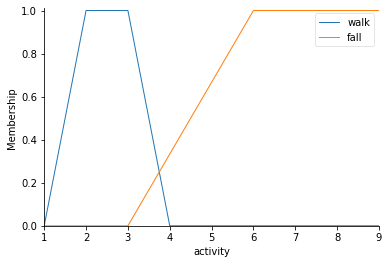

In [11]:
activity['walk'] = fuzz.trapmf(action.universe, [1, 2, 3, 4])
activity['fall'] = fuzz.trapmf(action.universe, [3, 6, 10, 10])
activity.view()

In [12]:
rule1 = ctrl.Rule(amplitude['low'], (activity['walk']))
rule2 = ctrl.Rule(amplitude['high'], (activity['fall']))

In [13]:
activity_decider = ctrl.ControlSystem(
    [rule1, rule2])

In [16]:
predict = ctrl.ControlSystemSimulation(activity_decider)
#pumping2 = ctrl.ControlSystemSimulation(irrigate_ctrl)

COG: 
3.6162650934822143


C:\Users\PC\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


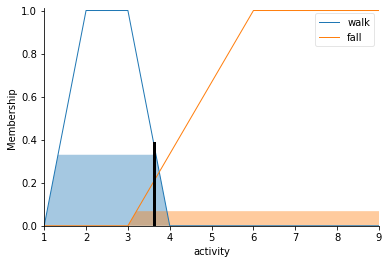

In [18]:
amplitude=36.7
predict.input['amplitude'] = amplitude
predict.compute()
print('COG: ')
print(predict.output['activity'])

activity.view(sim=predict)
